In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [16]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    operation1: str
    operation2: str
    current_result: int
    final_result: int

def add(state: AgentState) -> AgentState:
    if state['current_result'] is None:
        state['current_result'] = state['number1'] + state['number2']
    else:
        state['current_result'] = state['current_result'] + state['number3']
    return state

def subtract(state: AgentState) -> AgentState:
    if state['current_result'] is None:
        state['current_result'] = state['number1'] - state['number2']
    else:
        state['current_result'] = state['current_result'] - state['number3']
    return state

def router(state: AgentState) -> AgentState:
    if state['operation1'] == 'add':
        return "add_node"
    elif state['operation1'] == 'subtract':
        return "subtract_node"
    else:
        return "finish"
    
def router2(state: AgentState) -> AgentState:
    if state['operation2'] == 'add':
        return "add_node"
    elif state['operation2'] == 'subtract':
        return "subtract_node"
    else:
        return "finish"

In [26]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add)
graph.add_node("add_node2", add)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)
graph.add_node("subtract_node", subtract)
graph.add_node("subtract_node2", subtract)

graph.add_edge(START, "router1")
graph.add_conditional_edges("router1", router, {"add": "add_node", "subtract": "subtract_node"})

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges("router2", router2, {"add": "add_node2", "subtract": "subtract_node2"})

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()


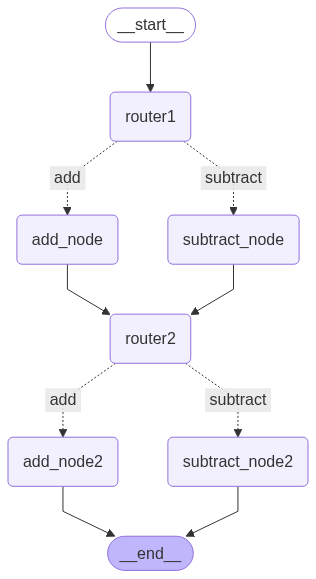

In [27]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))